# Ex05 - Filtros de aguçamento

## 1. Unsharp mask

Um filtro bastante utilizado para aguçar a imagem é denominado *unsharp mask*. Ele é capaz de realçar bordas calculando a diferença entre a imagem original e uma versão suavizada da imagem filtrada pela gaussiana. Para conseguir o realce de bordas, faça:

- Calcule primeiro a *unsharp mask* ($df$)
- Faça uma ponderação entre a imagem original e a imagem diferença: 
$$((1-k)*f + k*df)$$ onde $f$ é a imagem, $df$ é a *unsharp mask* e $k$ é o fator de ponderação 
- Mude o fator de ponderacao $k$ e veja o efeito na imagem final


In [0]:
#importação de módulos necessários

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal
from PIL import Image

import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

%matplotlib inline

Vamos calcular a *unsharp mask df* a partir da diferença entre a imagem original e uma imagem suavizada.

Primeiro, temos que efetuar a suavização da imagem:

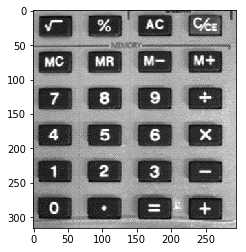

In [0]:
f = mpimg.imread('../data/keyb.tif')

#plt.title('imagem original')
#plt.axis('off')
plt.imshow(f,'gray')


In [0]:
def kernel_media(size):

    kernel = np.ones(size*size).reshape(size,size)
    kernel = (1/(size*size))*kernel
    
    return kernel


def img_smooth(image, method = 'mean'):
    
    #recebe uma imagem e efetua a suavização dela de acordo com o tipo de filtro de máscara escolhida (média ou gaussiana)
    
    if method == 'mean':
        
        matrix = kernel_media(3)
        
        
        
    
    if method == 'gaussian':
        #kernel gaussiano 3x3, sigma= 1
        matrix = np.array([[0.077847,0.123317,0.077847],
                           [0.123317,0.195346,0.123317],
                           [0.077847,0.123317,0.077847]])

        
        
    fig = signal.convolve(image,matrix,mode='same')
    return fig


def compare_img(img1,img2):
    
    plt.subplot(1,2,1)
    plt.title('original')
    plt.axis('off')
    plt.imshow(img1,'gray')
    plt.subplot(1,2,2)
    plt.title('new')
    plt.axis('off')
    plt.imshow(img2,'gray')
                

Aqui fazemos um teste para verificar o efeito de suavização da imagem:

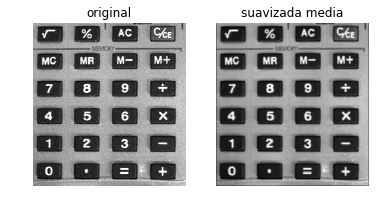

In [0]:
fg = img_smooth(f,'gaussian')


plt.subplot(1,2,1)
plt.title('original')
plt.axis('off')
plt.imshow(f,'gray')
plt.subplot(1,2,2)
plt.title('suavizada media')
plt.axis('off')
plt.imshow(fg,'gray')



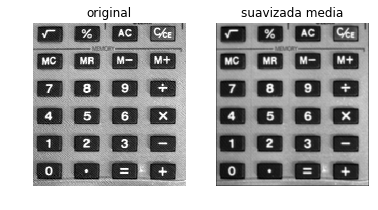

In [0]:
f2 = img_smooth(f,'mean')

plt.subplot(1,2,1)
plt.title('original')
plt.axis('off')
plt.imshow(f,'gray')
plt.subplot(1,2,2)
plt.title('suavizada media')
plt.axis('off')
plt.imshow(f2,'gray')



Após a definição dessas funções básicas, vamos obter a imagem suavizada **gmask**: (*referência: GONZALEZ, R., WOODS, R. - Digital Image Processing, 3rd Ed*.  -- **equação 3.6-8, página 163 ** ) $$g_{mask}(x,y) = f(x,y) -\bar f(x,y) $$

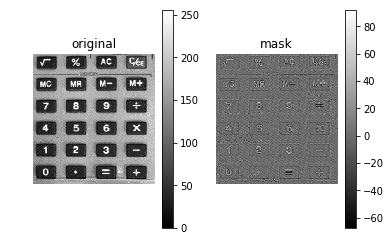

In [0]:
#fmed é a imagem suavizada
fmed = img_smooth(f,'gaussian')

#a máscara é obtida subtraindo a imagem suavizada da original
gmask = f - fmed
        

plt.subplot(1,2,1)
plt.title('original')
plt.axis('off')

plt.imshow(f,'gray')
plt.colorbar()
plt.subplot(1,2,2)
plt.title('mask')
plt.axis('off')
plt.imshow(gmask,'gray')
plt.colorbar()




Analisando as imagens obtidas, e principalmente a barra de níveis de cinza, ressaltamos aqui a importância de ter obtido valores negativos com essa operação. Isso vai influenciar os cálculos realizados no futuro.

Seguindo agora a **equação 3.6-9** do livro (também na página 163), temos $$g(x,y) = f(x,y) + k*g_{mask}(x,y) $$

Vamos fazer uma comparação com a equação sugerida no exercício:
$$g(x,y) = ((1-k)*f + k*df)$$ 
$$g(x,y) = (f-k*f + k*df)$$ 
$$g(x,y) = (f+ k*(df-f))$$
$$g(x,y) = (f- k*(f-df))$$ 

Assim, por analogia, podemos supor que a diferença df-f (ou f-df, invertendo o sinal em k) pode ser entendida como gmask. Se isso for verdade, fmed seria igual a df. Vamos fazer algumas comparações para verificar essa suposição:

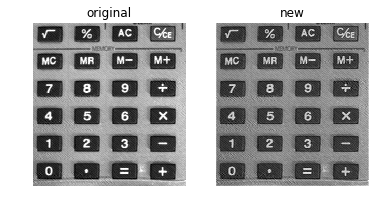

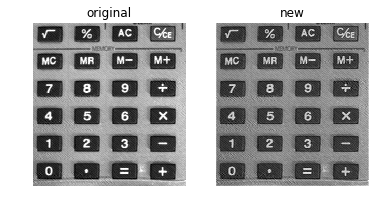

In [0]:
k = 1

#gonzalez
gmask = f - fmed
g0 = f + k*gmask



#equações fornecidas, assumindo que a diferença df é igual a fmed
lapl = fmed-f
g1 = f - k*lapl


compare_img(f,g0)

plt.figure()

compare_img(f,g1)


Como obtivemos o mesmo resultado, comprovamos a suposição feita.


Mais informações podem ser vistas em https://www.idtools.com.au/unsharp-masking-python-opencv/

*"In other words, the Laplacian of an image is approximated by the **difference between the original image and a smoothed (unsharp) version of that same image**. This is where the name of this image processing algorithm comes from."*

*We can write this insight In pseudocode:*

$$sharp\_ image = image - a * (image - unsharp) = (1-a)*image - a*unsharp$$

Note que o segundo membro desta  equação é idêntica à expressão $$((1-k)*f + k*df)$$  sendo a=k , f=image e df=unsharp

Existe mais um detalhe importante referente à visualização das imagens. Vamos plotar novamente as imagens obtidas, exibindo desta vez a barra de cores:



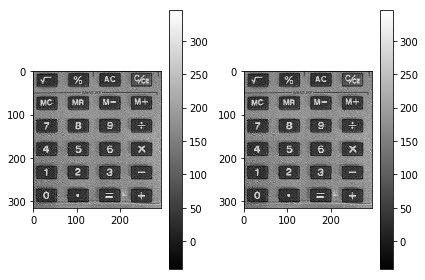

In [0]:
plt.subplot(1,2,1)
plt.imshow(g0,'gray')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(g1,'gray')
plt.colorbar()

plt.tight_layout()

Aqui obtemos a explicação do fato das imagens terem ficado acinzentadas com a aplicação da unsharp mask. Os valores mais negativos foram exibidos como sendo tons mais escuros, e os valores iguais a zero como tons mais claros. É necessária a realização de um processamento para que todo valor menores quer zero sejam elevados até zero, escalando os demais valores também.

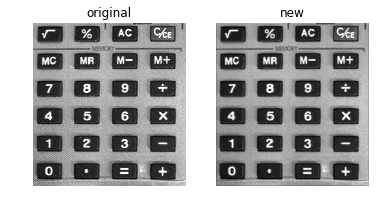

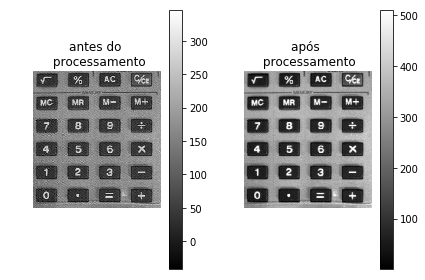

In [0]:
fm = fmed - np.min(fmed)

fs = 255*(fm/np.max(fm))

#g3 = (1-k)*np.array(f) +k*fs
g3 = f +k*fs



compare_img(f,g3)

plt.figure()


plt.subplot(1,2,1)
plt.title('antes do \n processamento')
plt.imshow(g1,'gray')
plt.axis('off')
plt.colorbar()

plt.subplot(1,2,2)
plt.title('após \n processamento')
plt.imshow(g3,'gray')
plt.axis('off')
plt.colorbar()

plt.tight_layout()

Agora, vamos implementar uma função para a aplicação dessa máscara que nos permita variar o coeficiente k de maneira a fazer alguns experimentos:

In [0]:
def unsharp_mask(im,k,mode='gaussian'):
    
    if mode == 'mean':
        
        #obtencao da unsharp mask a partir da convolucao
        matrix = kernel_media(3)
        fconv = signal.convolve(im,matrix,mode='same')
        
        #laplaciano
        lapl = im - fconv
        
        #scaling
        fm = lapl - np.min(lapl)

        fs = 255*(fm/np.max(fm))

        return im +k*fs

        
        
    
    if mode == 'gaussian':
        #kernel gaussiano dimensão 3, sigma=1
        matrix = np.array([[0.077847,0.123317,0.077847],
                           [0.123317,0.195346,0.123317],
                           [0.077847,0.123317,0.077847]])

        fconv = signal.convolve(im,matrix,mode='same')
        
        #laplaciano
        lapl = im - fconv
        
        #scaling
        fm = lapl - np.min(lapl)

        fs = 255*(fm/np.max(fm))

        return im +k*fs

    return fig

A seguir, faremos variações com os valores de k:

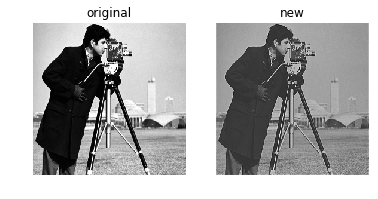

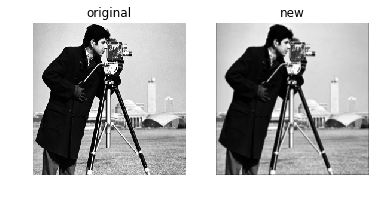

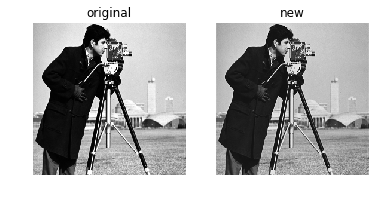

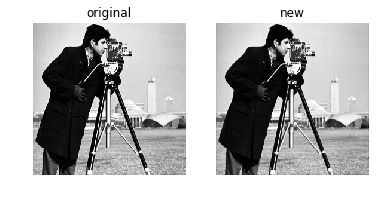

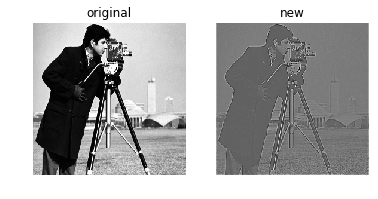

In [0]:
teste = mpimg.imread('../data/cameraman.tif')
tk1 = unsharp_mask(teste,1)
tk2 = unsharp_mask(teste,-1)
tk3 = unsharp_mask(teste,0.25)
tk4 = unsharp_mask(teste,-0.25)
tk5 = unsharp_mask(teste,7)

compare_img(teste,tk1)
plt.figure()
compare_img(teste,tk2)
plt.figure()
compare_img(teste,tk3)
plt.figure()
compare_img(teste,tk4)
plt.figure()
compare_img(teste,tk5)



## 2. Filtro de Sobel

Existem vários filtros que procuram realçar as bordas da imagem. Um dos mais conhecidos é o Operador Sobel, composto por uma máscara vertical (Sv) e uma máscara horizontal (Sh).

In [0]:
import numpy as np

Sv = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
print('Sv =\n',Sv)

Sh = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
print('Sh =\n',Sh)



Sv =
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]
Sh =
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


### 2.1 Implementar o operador Magnitude Sobel de uma imagem.

A função MagSobel a ser implementada possui como parâmetro a imagem de entrada e deve seguir a seguinte equação:

$$MagSobel = \sqrt{f_h^2 + f_v^2}$$

onde $f_h$ é a imagem de entrada convolvida com o operador de Sobel horizontal e $f_v$ é a imagem de entrada convolvida com o operador de Sobel vertical.

Existem alguns cuidados necessários:

- As operações devem todas serem feitas em ponto flutuante e os valores finais serão maiores de 255. Assim, a função que calcula a magnitude do gradiente Sobel é feita de acordo com a equação dada. 
- Lembre-se que para visualizar a imagem será necessário antes normalizar a imagem utilizando, por exemplo, o ianormalize. 
- Adicionalmente, como a máscara Sobel é 3x3, a imagem resultante terá altura e largura maiores que a original por 2x2 pixels já que a imagem resultante da convolução linear é a soma dos tamanhos em cada dimensão, menos 1.



Vamos implementar a função MagSobel, tomando o cuidado de tratar a imagem de entrada (passando a para o tipo 'float64' antes de realizar as operações:

In [0]:
def MagSobel(fig,fh,fv):
    
    newfig = fig.copy().astype('float64')
       
    conv_v = signal.convolve(newfig,fv,mode='same')
    conv_h = signal.convolve(newfig,fh,mode='same')
    
    conv_v2 = conv_v**2
    
    conv_h2 = conv_h**2
    
    mag = np.sqrt(conv_v2 + conv_h2)
    
    return mag

Assim, vamos realizar um teste com a função implementada:

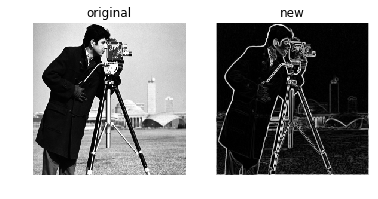

In [0]:
figt = mpimg.imread('../data/cameraman.tif')
res = MagSobel(figt,Sh,Sv)

compare_img(figt,res)

### 2.2 Implementar uma funcao que retorna o ângulo da borda de Sobel

Após implementar a função que retorna o ângulo da borda de Sobel:
- calcule o histograma da distribuição deste ângulo, somente para valores de magnitude de borda acima de um limiar $T$;
- visualize a imagem de ângulo utilizando uma tabela de cores circular para os ângulos e uma cor diferente para usar nos locais onde a magnitude for menor que $T$. Plote junto com a figura, a tabela de cores usada;


## 3. Propriedades da convolução

Realize experimentos para demostrar as propriedades da convolução:

- Comutativa $$f(x,y)*g(x,y) = g(x,y)*f(x,y)$$
- Associativa $$f(x,y)*[g(x,y)*h(x,y)] = [f(x,y)*g(x,y)]*h(x,y)$$

Crie um exemplo que demonstre como usar a propriedade associativa para realizar a filtragem de uma imagem por um filtro passa-faixa. (Dica: use uma máscara passa-baixas e uma máscara passa-altas).

### Resolução

Aqui vamos utilizar a função signal.convolve para convoluir algumas imagens e mostrar que o efeito resultante é o mesmo independente da ordem, provando a propriedade comutativa. Note que utilizamos o mode='full' para garantir que os vetores de saída fiquem com a mesma dimensão.

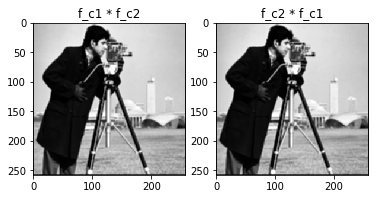

In [0]:
f_c1 = mpimg.imread('../data/cameraman.tif')
f_c2 = (1/9)*np.array([[1,1,1],[1,1,1],[1,1,1]])

out_1 = signal.convolve(f_c1,f_c2,mode='full')
out_2 = signal.convolve(f_c2,f_c1,mode='full')


plt.subplot(1,2,1)
plt.title('f_c1 * f_c2')
plt.imshow(out_1,'gray')

plt.subplot(1,2,2)
plt.title('f_c2 * f_c1')
plt.imshow(out_2,'gray')





Não há diferença entre as duas imagens, o que ainda pode ser visto caso façamos a diferença entre as duas saídas obtidas:

In [0]:
print(out_1 - out_2)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Para verificar a propriedade associativa, vamos criar uma terceira máscara:

In [0]:
f_c3 = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

Agora, vamos gerar novas funções de convolução:

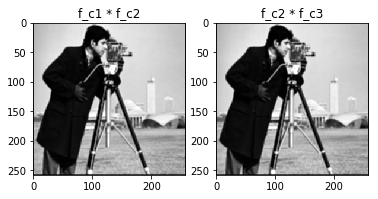

In [0]:
c1_c2 = signal.convolve(f_c1,f_c2,mode='full')
c2_c3 = signal.convolve(f_c2,f_c3,mode='full')

plt.subplot(1,2,1)
plt.title('f_c1 * f_c2')
plt.imshow(out_1,'gray')

plt.subplot(1,2,2)
plt.title('f_c2 * f_c3')
plt.imshow(out_1,'gray')


Por fim, façamos mais um conjunto de convoluções:

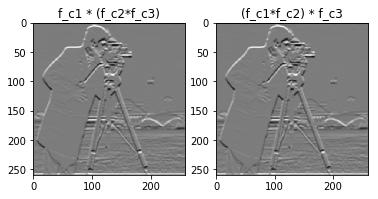

In [0]:
c1_c2c3 = signal.convolve(f_c1,c2_c3,mode='full')
c1c2_c3 = signal.convolve(c1_c2,f_c3,mode='full')


plt.subplot(1,2,1)
plt.title('f_c1 * (f_c2*f_c3)')
plt.imshow(c1_c2c3,'gray')

plt.subplot(1,2,2)
plt.title('(f_c1*f_c2) * f_c3')
plt.imshow(c1c2_c3,'gray')

Novamente, o efeito obtido foi o mesmo. Para comprovar, façamos a diferença entre as duas imagens. Foi utilizado o método .astype('uint8') para evitar diferenças provenientes de arredondamentos pela precisão utilizada e os cálculos.

In [0]:
dif = (c1_c2c3-c1c2_c3).astype('uint8')

print(dif)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Um filtro passa faixa nada mais é que a composição de dois filtros: um passa altas e um passa baixas. A faixa delimitada por esse filtro é, portanto, determinada pelos limiares impostos a cada um deles. O filtro passa baixas utilizado será o filtro de média, enquanto o filtro passa altas será um filtro de aguçamento.

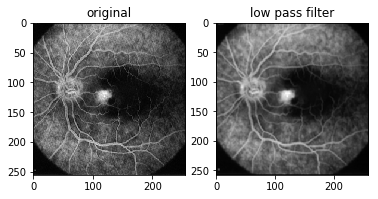

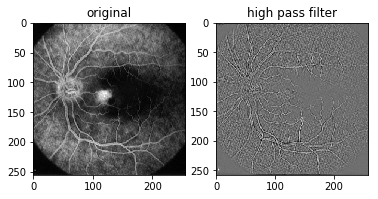

In [0]:
def low_pass(f):
    
    matrix = kernel_media(3)
    
    return signal.convolve(f,matrix,'full')
    
    
def high_pass(f):
    
    matrix = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
    
    return signal.convolve(f,matrix,'full')

fimg = mpimg.imread('../data/retina.tif')

lp = low_pass(fimg)
hp = high_pass(fimg)


plt.subplot(1,2,1)
plt.title('original')
plt.imshow(fimg,'gray')

plt.subplot(1,2,2)
plt.title('low pass filter')
plt.imshow(lp,'gray')

plt.figure()

plt.subplot(1,2,1)
plt.title('original')
plt.imshow(fimg,'gray')

plt.subplot(1,2,2)
plt.title('high pass filter')
plt.imshow(hp,'gray')

Agora, vamos fazer a convolução das duas máscaras juntas para a obtenção do filtro passa faixas:

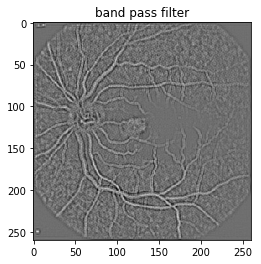

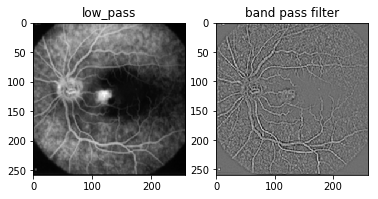

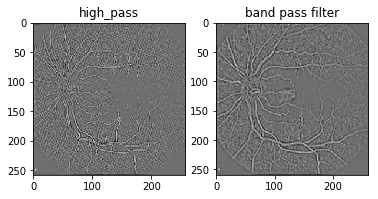

In [0]:
def band_pass(f):
    
    f1 = low_pass(f)
    
    f2 = high_pass(f1)
    
    
    return f2


bp = band_pass(fimg)

plt.title('band pass filter')
plt.imshow(bp,'gray')

plt.figure()


plt.subplot(1,2,1)
plt.title('low_pass')
plt.imshow(lp,'gray')

plt.subplot(1,2,2)
plt.title('band pass filter')
plt.imshow(bp,'gray')

plt.figure()


plt.subplot(1,2,1)
plt.title('high_pass')
plt.imshow(hp,'gray')

plt.subplot(1,2,2)
plt.title('band pass filter')
plt.imshow(bp,'gray')

Como podemos observar, o efeito resultante no passa faixa é a soma dos efeitos dos dois filtros, comprovando assim a propriedade associativa da convolução.